# DECISION TREES 

In [1]:
# Load libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn import datasets
from IPython.display import Image  
from sklearn import tree
import pydotplus

## DECISION TREES FOR CLASSIFICATION

In [3]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree_cancer = DecisionTreeClassifier(random_state=0)
tree_cancer.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree_cancer.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree_cancer.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.937


We can actually see that we obtain a 100 % accuracy on the training set because the leaves are pure, the tree was grown deep enough that it could perfectly memorize all the labels on the training data.

# If we don´t restrict the depth of a decision tree, the tree can become arbitrarily deep and complex. Unpruned trees are therefore prone to overfitting and not generalizing well to new data.¶

# Now let´s apply pre-prunning to the tree, which will stop developing the tree before we perfectly fit to the training data. One option is to stop building the tree after reaching a certain depth. This leads to a lower accuracy on the training set, but an improvement on the test set.

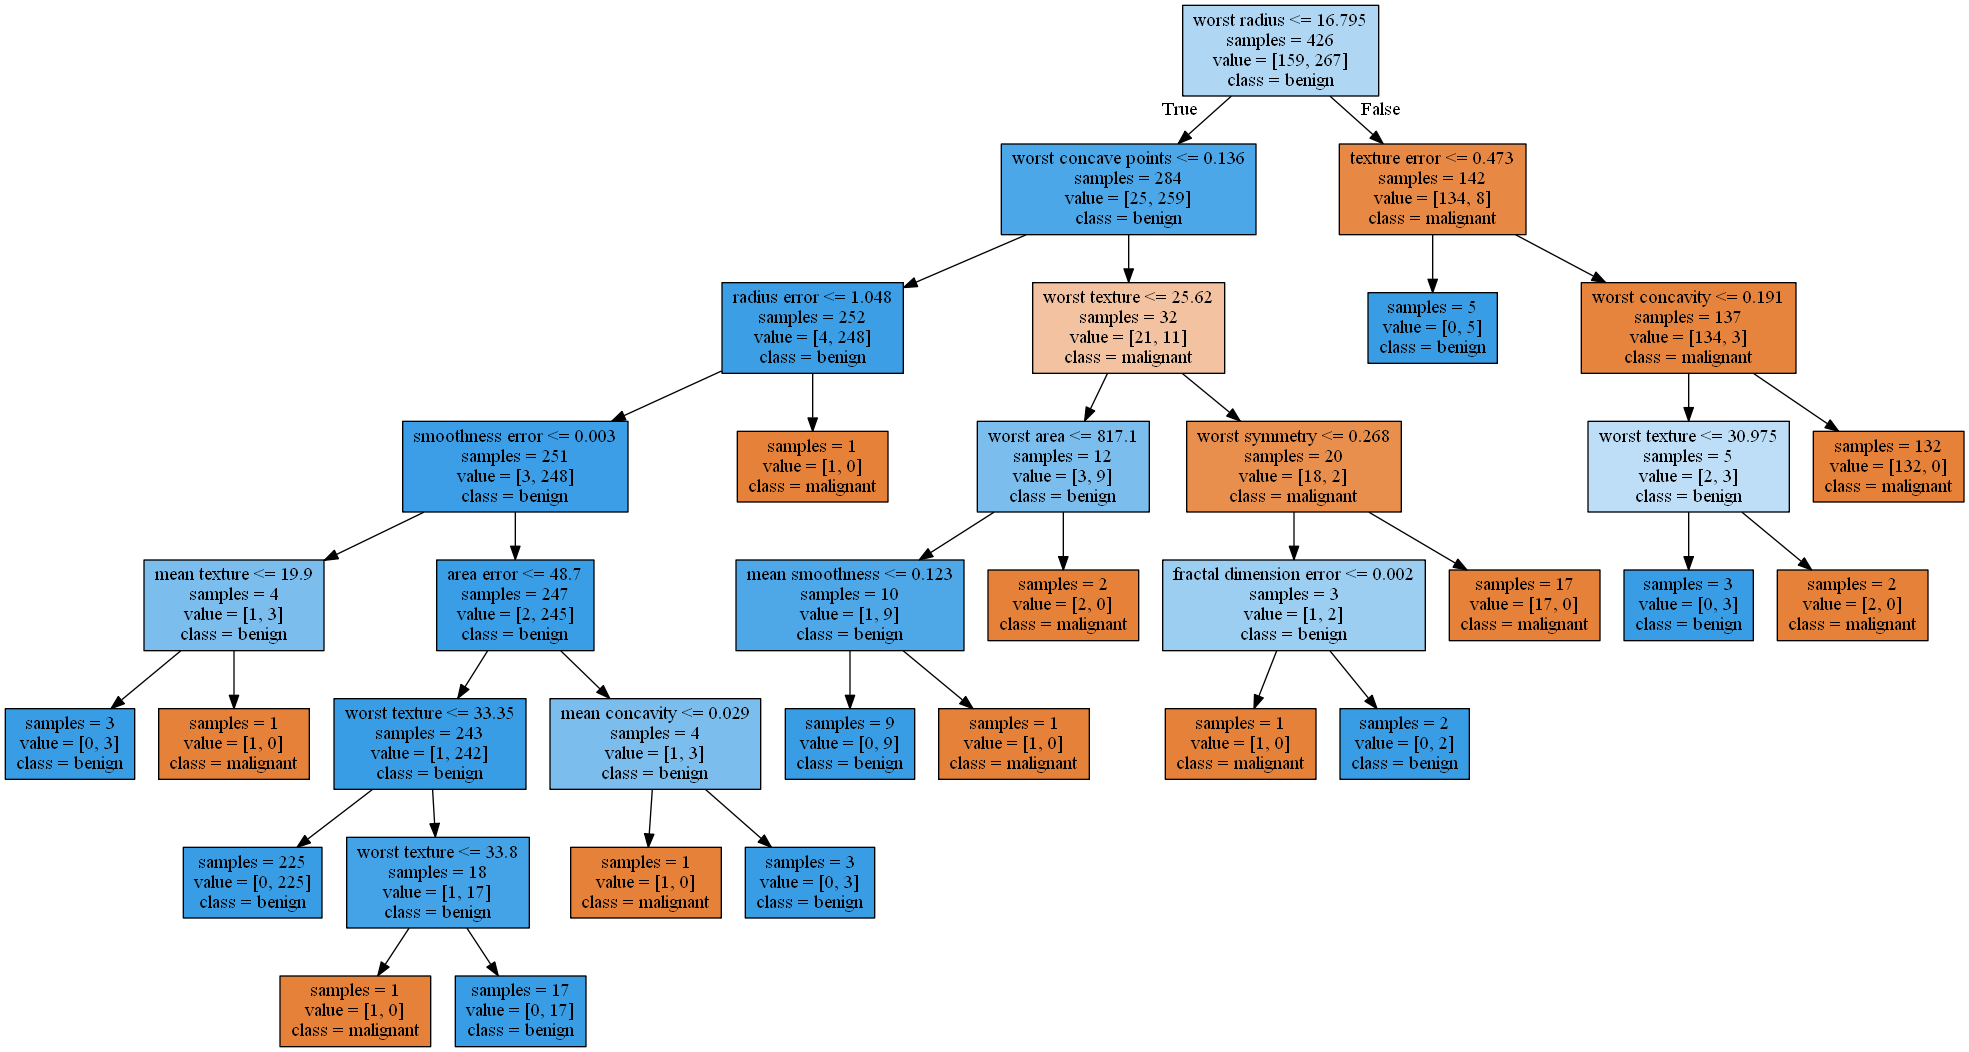

In [14]:
# Create DOT data
dot_data = tree.export_graphviz(tree_cancer, out_file=None, feature_names=cancer.feature_names,  class_names=["malignant","benign"],  impurity=False, filled=True)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

# Max Depth
As it can be seen in the following decision tree if we reduce the max depth up to 4, the model is more simple and even though the accuracy in the training set is worse, the accuracy obtaint in the test is better. So we have reduce the overfitting from the previous model.

This is a way pre-prunning the decision tree to prevent overfitting. Other alternatives are parameters for max_depth, max_leaf_nodes, or min_samples_leaf

In [19]:
tree_cancer_max_depth = DecisionTreeClassifier(random_state=0, max_depth=4)
tree_cancer_max_depth.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree_cancer_max_depth.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree_cancer_max_depth.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.951


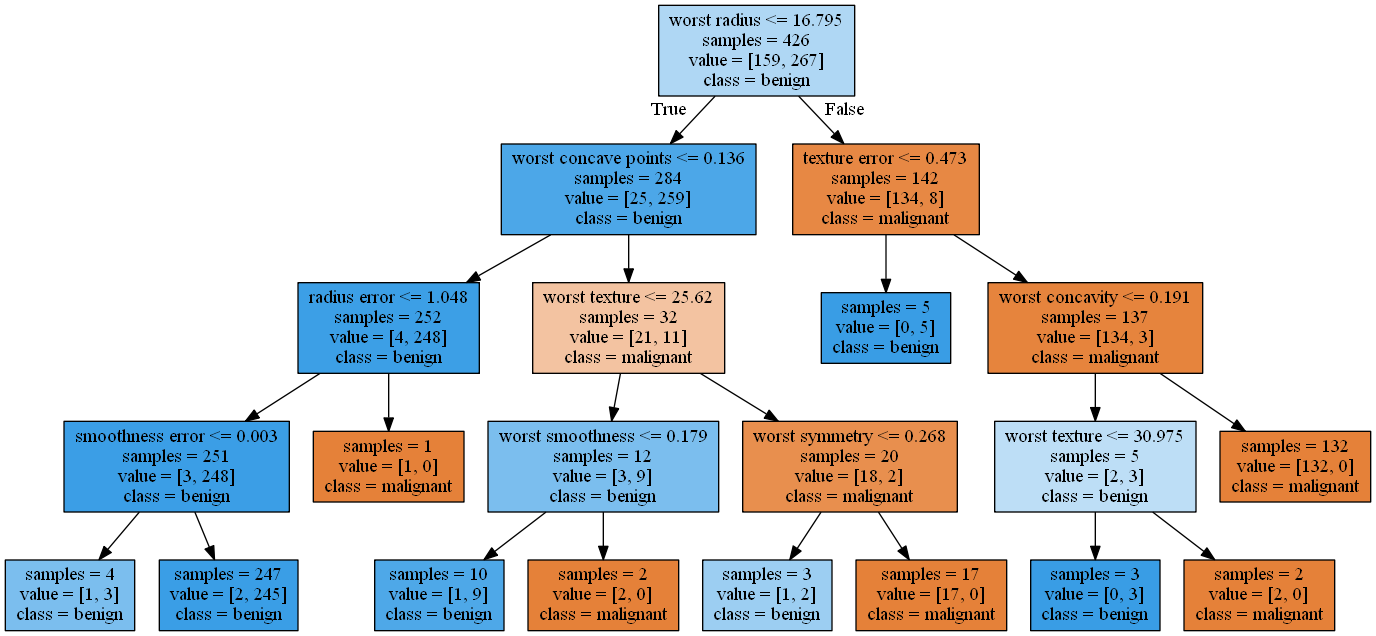

In [20]:
# Create DOT data
dot_data = tree.export_graphviz(tree_cancer_max_depth, out_file=None, feature_names=cancer.feature_names,  class_names=["malignant","benign"],  impurity=False, filled=True)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

# Feature importance
rates how important each feature is for the decision a tree makes. It is a number between 0 and 1 for each feature, where 0
means “not used at all” and 1 means “perfectly predicts the target.” The feature importances always sum to 1:

In [15]:
print("Feature importances:\n{}".format(tree_cancer.feature_importances_))

Feature importances:
[ 0.          0.00752597  0.          0.          0.00903116  0.
  0.00752597  0.          0.          0.          0.00975731  0.04630969
  0.          0.00238745  0.00231135  0.          0.          0.          0.
  0.00668975  0.69546322  0.05383211  0.          0.01354675  0.          0.
  0.01740312  0.11684357  0.01137258  0.        ]


In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

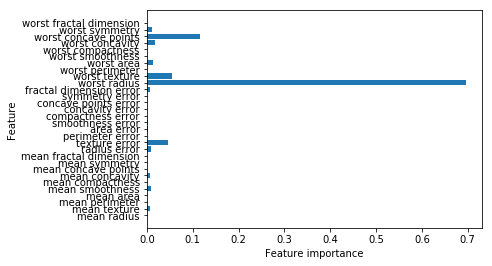

In [17]:
plot_feature_importances_cancer(tree_cancer)

## DECISION TREES FOR REGRESSION 

The usage and analysis of regression trees is very similar to that of classification trees. There is one particular property of using tree-based models for regression that we want to point out, though. The DecisionTreeRegressor (and all other tree-based regression models) is not able to extrapolate, or make predictions outside of the range of the training data. 

Text(0,0.5,'Price in $/Mbyte')

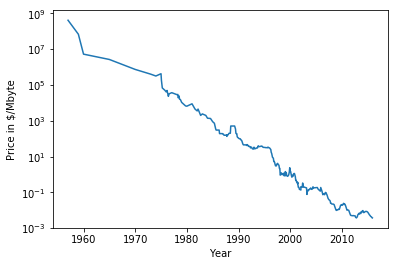

In [22]:
import pandas as pd
ram_prices = pd.read_csv("data/ram_price.csv")
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("Year")
plt.ylabel("Price in $/Mbyte")

In [25]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
# use historical data to forecast prices after the year 2000
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]
# predict prices based on date
X_train = data_train.date[:, np.newaxis]
# we use a log-transform to get a simpler relationship of data to target
y_train = np.log(data_train.price)
tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)
# predict on all data
X_all = ram_prices.date[:, np.newaxis]
pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)
# undo log-transform
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

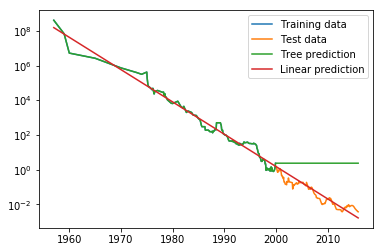

In [32]:
plt.semilogy(data_train.date, data_train.price, label="Training data")
plt.semilogy(data_test.date, data_test.price, label="Test data")
plt.semilogy(ram_prices.date, price_tree, label="Tree prediction")
plt.semilogy(ram_prices.date, price_lr, label="Linear prediction")
plt.legend()

In [35]:
fig = plt.gcf()
fig.set_size_inches(40, 40)
fig.savefig('test2png.png', dpi=100)

<Figure size 2880x2880 with 0 Axes>

Once we leave the data range for which the model has data, the model simply keeps predicting the last known point. The tree has no ability to generate “new” responses, outside of what was seen in the training data.

One of the advantages of decission trees is that they are invariant to scaling of the data. As each feature is processed separately, and the possible splits of the data don’t depend on scaling, no preprocessing like normalization or standardization of features is needed for decision tree algorithms. In particular, decision trees work well when you have features that are on completely different scales, or a mix of binary and continuous
features.

The main downside of decision trees is that even with the use of pre-pruning, they tend to overfit and provide poor generalization performance.